# Stock Analysis of Recession Resilient Companies

The goal for this code is to find stocks that have been resilient to past major US recessions, analyze what they have in common and use this information to pick which ones are most likely to keep on staying afloat during economic downturns.

In [15]:
#Import pandas for functions and datareading
#Import MatplotLib for plotting
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#Function to provide financial data when called
def readmydata(tickers, start_date, end_date):
    financial_data = data.DataReader(tickers, 'yahoo', start_date, end_date)
    df = pd.DataFrame(financial_data)
    df.columns = df.columns
    output = df.stack(level=-1)
    return output

In [25]:
#Function takes as input dataframe and picks columns
def pickmydata(data_pack, attributes, num_days):
    col = data_pack[attributes]
    col.head()
    
    #shows the companies requested
    mytickers_name = data_pack.index.get_level_values('Symbols')
    mytickers_name = mytickers_name.unique()
    
    #tickers within mytickers_name to pick from
    for x in mytickers_name:      
        #Query dataframe for the columns user asked for
        data_ticker = data_pack[data_pack.index.get_level_values('Symbols') == x]
        
        #Object series indexed by date
        data_ticker_attributes = col.loc[:, x]
        
        #Statistics for requested column
        output = data_ticker[attributes].describe()
        
        #20-day moving average
        short_rolling_tickers = data_ticker_attributes.rolling(window = num_days).mean()

        #Plot num_days referring to how many days are in a unit of rolling average
        fig, ax = plt.subplots(figsize=(16,9))
        ax.plot(data_ticker_attributes.index, data_ticker_attributes, label=x)
        ax.plot(short_rolling_tickers.index, short_rolling_tickers, label= 'Rolling average')
        ax.set_xlabel('Date')
        
        #Find only requested ticker
        ax.set_ylabel(attributes + ' Price ($)')
        ax.legend()
    return output

Companies that survive recessions tend to have basic
necessities needed by consumers. This is because consumer
staples and food are always in demand, even during 
economic downturns. Examples of such companies the likes
of Walmart, Kroger and General Mills

In [26]:
data_pack = readmydata(tickers=['^GSPC', 'WMT', 'KR', 'GIS', 'HRL', 'CPB'], start_date='2007-12-01', end_date='2009-06-30')
data_pack.head(10)

Attributes            Adj Close        Close         High          Low  \
Date       Symbols                                                       
2007-12-03 ^GSPC    1472.420044  1472.420044  1481.160034  1470.079956   
           WMT        34.368843    47.869999    48.310001    47.570000   
           KR         11.215736    14.445000    14.675000    14.250000   
           GIS        18.718277    29.985001    30.235001    29.855000   
           HRL         7.479506     9.907500     9.970000     9.820000   
           CPB        23.646523    36.669998    36.779999    36.430000   
2007-12-04 ^GSPC    1462.790039  1462.790039  1471.339966  1460.660034   
           WMT        34.598602    48.189999    48.560001    47.490002   
           KR         10.982802    14.145000    14.530000    14.145000   
           GIS        18.696428    29.950001    30.150000    29.745001   

Attributes                 Open        Volume  
Date       Symbols                             
2007-12-03 ^GSPC    1479.630005  3.323250e+09  
           WMT        47.709999  1.227610e+07  
           KR         14.455000  1.024120e+07  
           GIS        29.855000  4.256000e+06  
           HRL         9.877500  1.088800e+06  
           CPB        36.549999  1.846900e+06  
2007-12-04 ^GSPC    1471.339966  3.343620e+09  
           WMT        47.490002  1.646050e+07  
           KR         14.330000  1.090900e+07  
           GIS        29.745001  4.290400e+06

count    397.000000
mean      32.524433
std        3.858074
min       24.870001
25%       29.100000
50%       33.020000
75%       35.860001
max       40.150002
Name: Close, dtype: float64

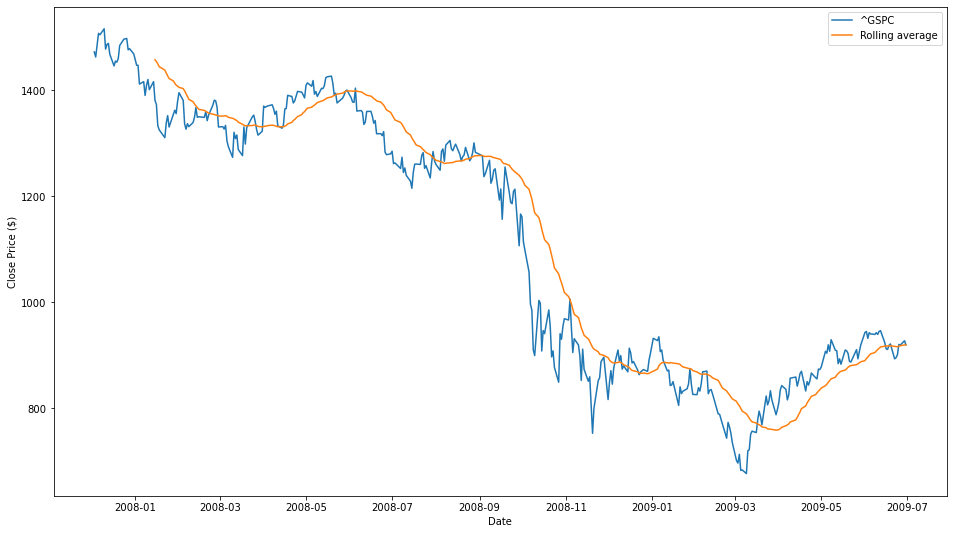

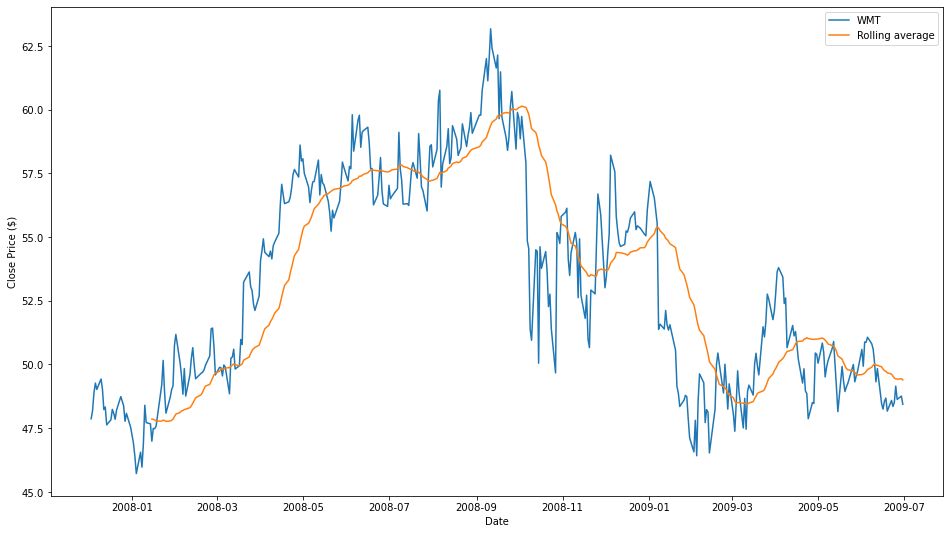

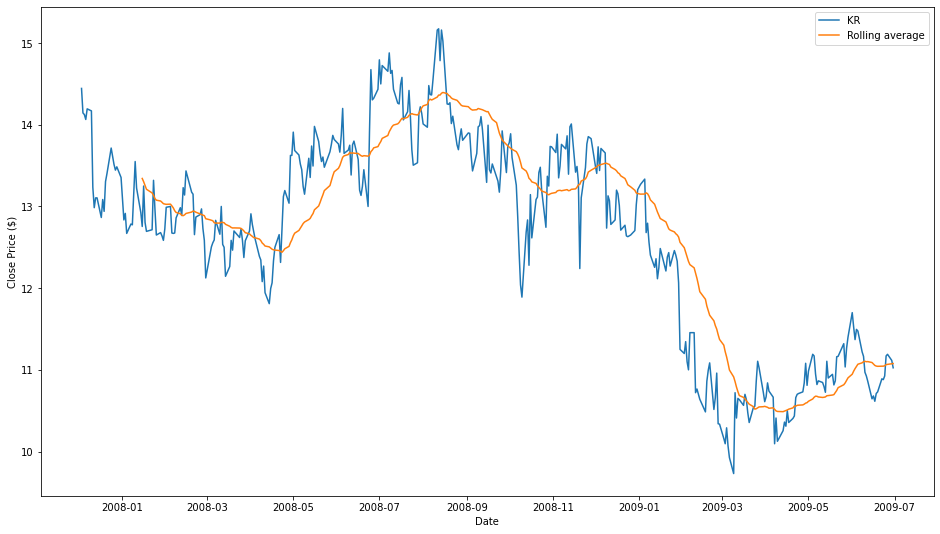

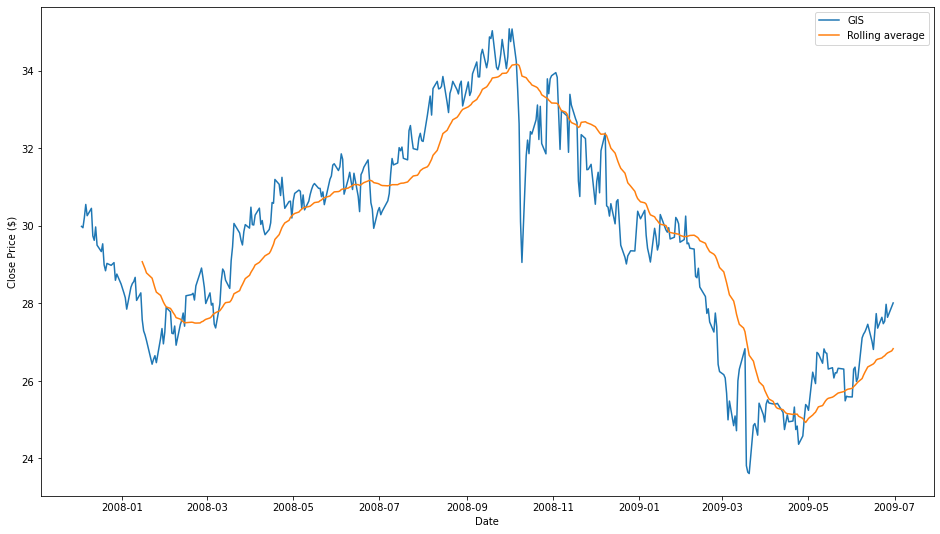

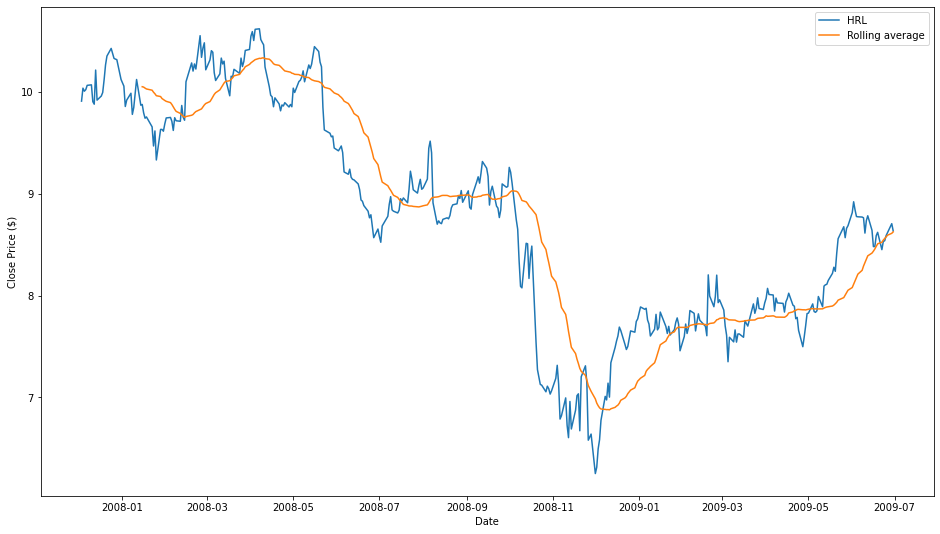

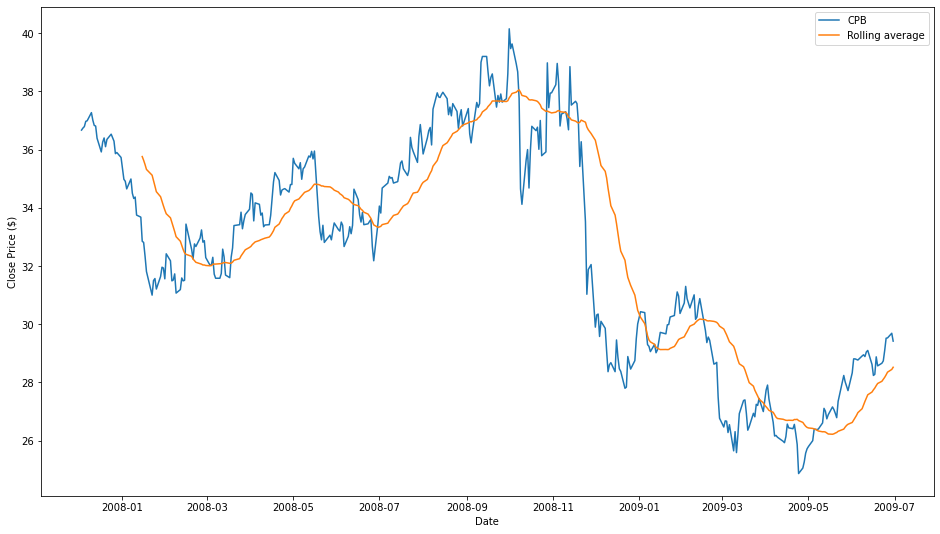

In [27]:
pickmydata(data_pack, "Close", 30)

Looking for trends, we can see that retail company stocks would hit a dip during the 
recession, but the precentage of the dip would be less extreme than that of the S&P.

Companies that tend to perform terribly are those who depend on consumers being able to afford big ticket item, such as
cars, housing and plane tickets. The reasons depend on the industry, for example, though the car industry is quickly 
becoming a necessity, are quite expensive and that alone makes the demand for them fall during economic downturns.

In [20]:
data_pack = readmydata(tickers=['^GSPC', 'AMT', 'F', 'BA', 'HST', 'AAL'], start_date='2007-12-01', end_date='2009-06-30')
data_pack.head(10)

Attributes            Adj Close        Close         High          Low  \
Date       Symbols                                                       
2007-12-03 ^GSPC    1472.420044  1472.420044  1481.160034  1470.079956   
           AMT        36.882504    44.919998    45.619999    44.750000   
           F           4.832798     7.250000     7.520000     7.230000   
           BA         67.270584    91.790001    93.199997    91.660004   
           HST        12.359057    18.766520    18.883993    18.374939   
           AAL        18.788834    19.930000    21.209999    19.820000   
2007-12-04 ^GSPC    1462.790039  1462.790039  1471.339966  1460.660034   
           AMT        34.854454    42.450001    44.389999    42.360001   
           F           4.646152     6.970000     7.240000     6.930000   
           BA         65.951393    89.989998    91.790001    89.849998   

Attributes                 Open        Volume  
Date       Symbols                             
2007-12-03 ^GSPC    1479.630005  3.323250e+09  
           AMT        45.220001  3.452200e+06  
           F           7.520000  3.493680e+07  
           BA         92.500000  5.423400e+06  
           HST        18.580519  3.745738e+06  
           AAL        21.209999  2.127800e+06  
2007-12-04 ^GSPC    1471.339966  3.343620e+09  
           AMT        44.389999  6.066100e+06  
           F           7.200000  5.544510e+07  
           BA         91.430000  7.080900e+06

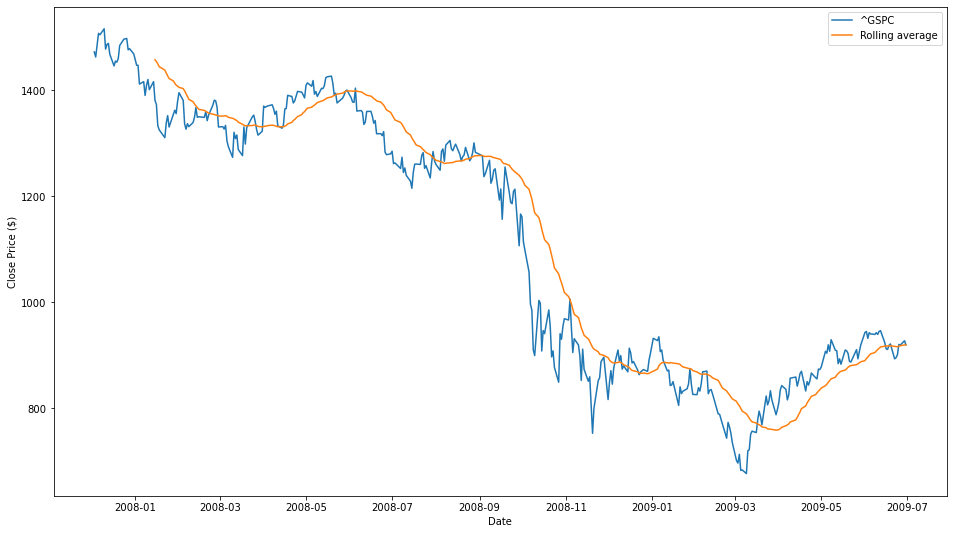

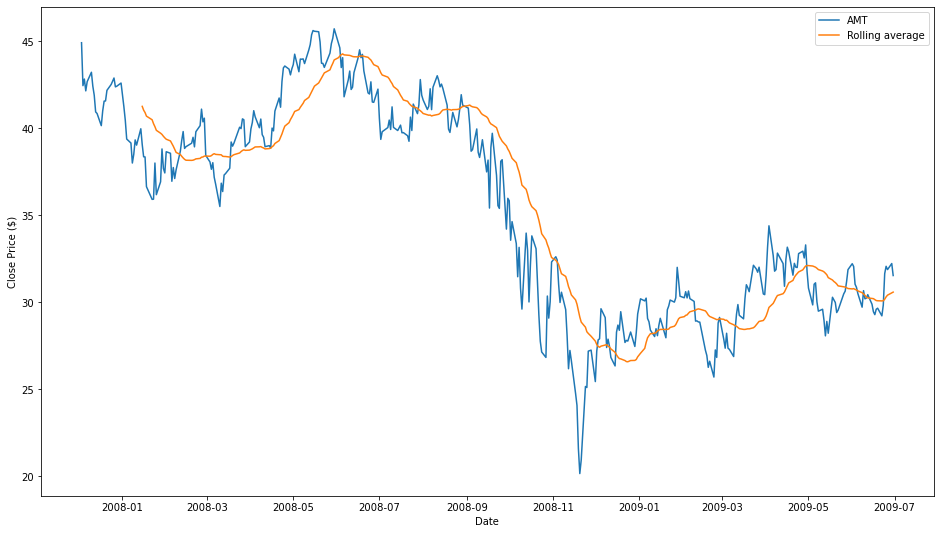

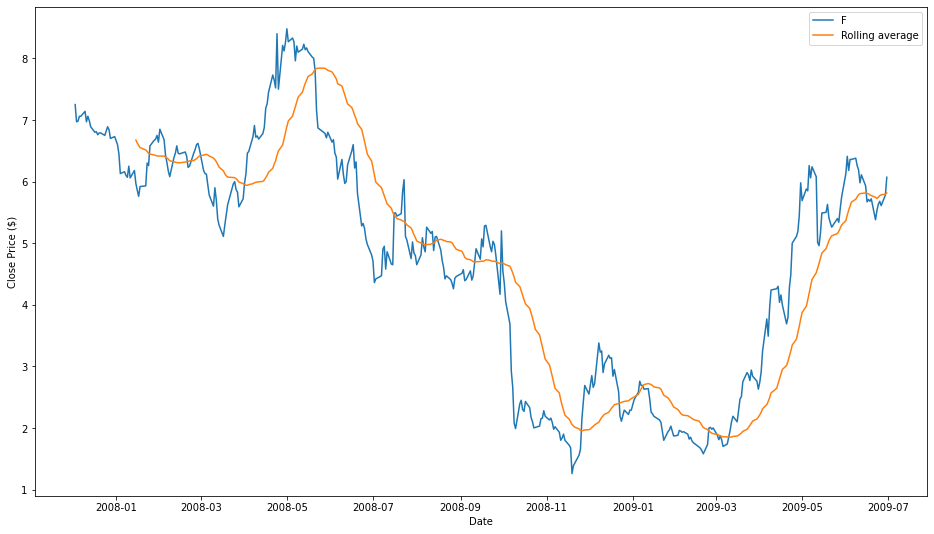

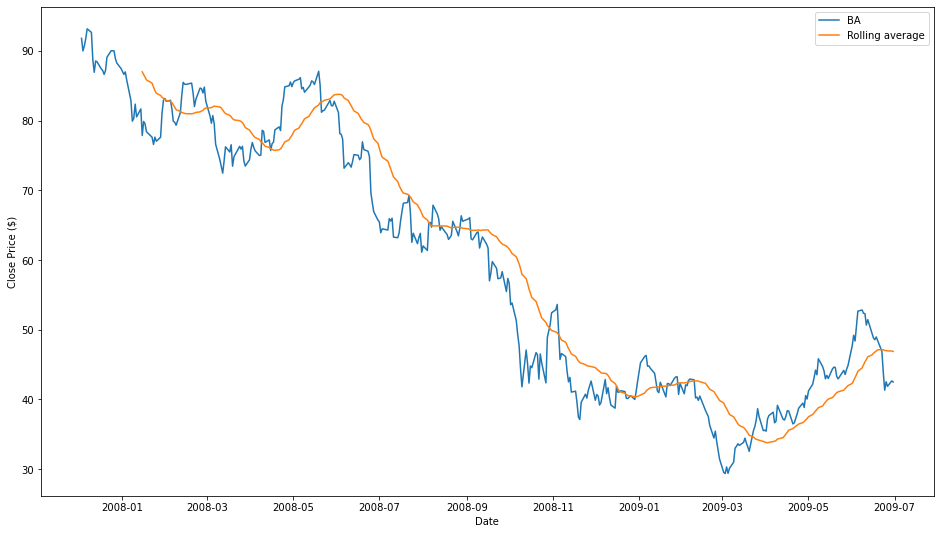

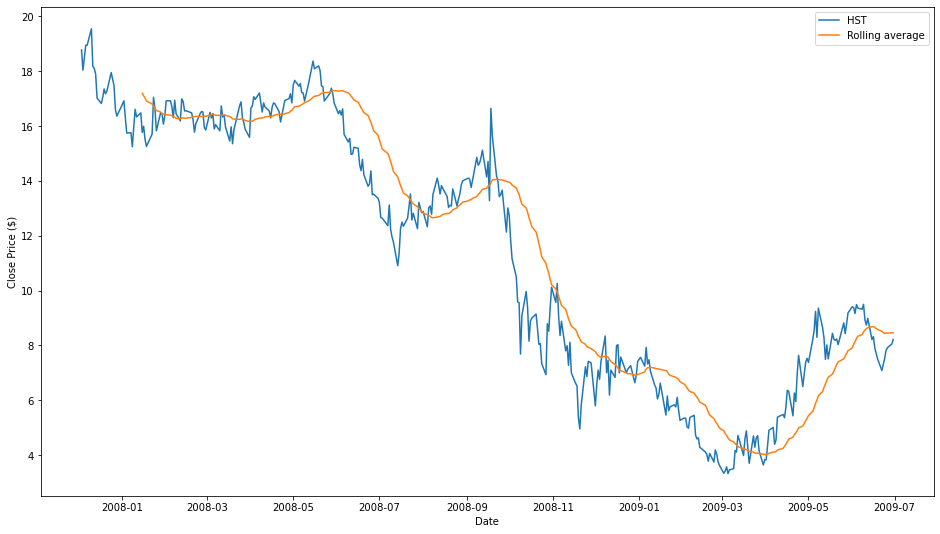

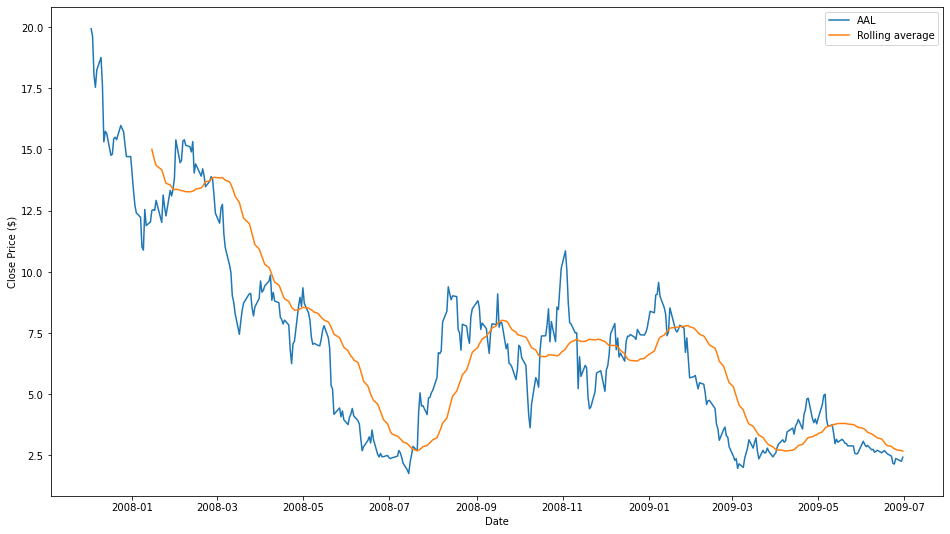

In [21]:
pickmydata(data_pack, "Close", 30)